In [1]:
import pandas as pd
import seaborn as sns
import networkExpansionPy.lib as ne
metabolism = ne.GlobalMetabolicNetwork()

In [24]:
names = metabolism.compounds.name.apply(lambda x: x.split(';')[0])
metabolism.compounds['name (short)'] = names
cmap = metabolism.compounds.set_index('cid')[['name (short)']]

In [44]:
rn_strings = {'rn': [], 'formula': []}
for rn,dff in metabolism.network.groupby('rn'):
    # make substrate string
    dff_subs = dff[dff['s'] < 0].set_index('cid').join(cmap)
    dff_prods = dff[dff['s'] > 0].set_index('cid').join(cmap)
    subs = dff_subs['s'].apply(lambda x: str(-x) + ' ') + dff_subs['name (short)']
    prods = dff_prods['s'].apply(lambda x: str(x) + ' ') + dff_prods['name (short)']
    subs = " + ".join(subs.tolist())
    prods = " + ".join(prods.tolist())
    rxn_str = subs + ' <==> ' + prods
    rn_strings['rn'].append(rn)
    rn_strings['formula'].append(rxn_str)

In [45]:
rn_strings = pd.DataFrame(rn_strings)

In [47]:
df = pd.read_hdf('ne_results.12seedSet.ConsistentNetwork.11222020.final.hdf','df');

In [48]:
def df2cyclnum(df):
    rxns = list(df)
    maxCycle = df.max().max() + 1;
    cycleNumToCount = {'rn':[],'cycle':[],'count':[]}
    for i in range(1,int(maxCycle)):
        for rxn in rxns:
            numOccur = sum(df[rxn] == i)
            cycleNumToCount['rn'].append(rxn)
            cycleNumToCount['cycle'].append(i)
            cycleNumToCount['count'].append(numOccur)
    cycleNumToCount = pd.DataFrame(cycleNumToCount)
    return cycleNumToCount

In [80]:
cutoff = 2000
dff = df.loc[df.isna().sum(axis=1) < cutoff]

dff= df.copy()

/Users/joshuagoldford/miniconda2/envs/network_expansion/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


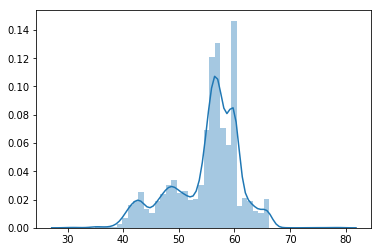

In [50]:
sns.distplot(df.max())

In [51]:
ec2rn = pd.read_csv('../../networkExpansionPy/networkExpansionPy/assets/KEGG/ec_rxn_mapping.txt',sep='\t')
pfam = pd.read_csv('../../networkExpansionPy/networkExpansionPy/assets/ec_pfam/ec_pfam_mappings.txt',sep='\t')

In [81]:
df_cn = pd.DataFrame(dff.mean(axis=1),columns=['cycle (mean)']);
df_cn = df_cn.join(ec2rn.set_index('rxn')).reset_index()
df_cn.columns = ['rn','cycle (mean)','ec'];
df_cn = df_cn.set_index('ec').join(pfam.set_index('ECNumber')[['PfamDomain']])

In [82]:
df_cn = df_cn.reset_index()
df_cn.columns = ['ec','rn','cycle (mean)','pfam']
df_cn.set_index('rn',inplace=True)

In [83]:
df_final = df_cn.join(rn_strings.set_index('rn')).reset_index()

In [85]:
df_final.set_index('rn').join(df_frac)

ValueError: Other Series must have a name

In [67]:
df_final.sort_values('cycle (mean)').to_csv('ne12seed.noThermo.ConsistentNetwork.averageCycleNum.PfamMap.Nov302020.csv')

In [78]:
df_frac = 1 - df.isna().T.sum() / 10000

In [88]:
df_frac = pd.DataFrame(df_frac,columns=['fraction of expansions'])

In [92]:
df_final.set_index('rn').join(df_frac).to_csv('ne12seed.noThermo.ConsistentNetwork.averageCycleNum.PfamMap.Nov302020.v2.csv')

In [95]:
df2 = df_final.set_index('rn').join(df_frac)

In [96]:
import seaborn as sns

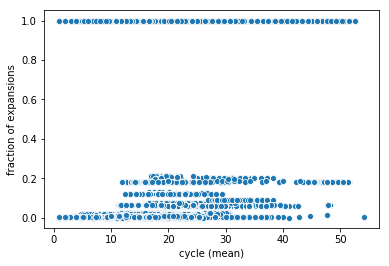

In [97]:
sns.scatterplot(x='cycle (mean)',y='fraction of expansions',data=df2)

In [98]:
df2

,ec,cycle (mean),pfam,formula,fraction of expansions
rn,,,,,
R00002,1.18.6.1,13.615385,PF00148,16 H2O + 16 ATP + 8 Reduced ferredoxin <==> 16...,0.0026
R00002,1.18.6.1,13.615385,PF11844,16 H2O + 16 ATP + 8 Reduced ferredoxin <==> 16...,0.0026
R00002,1.18.6.1,13.615385,PF03139,16 H2O + 16 ATP + 8 Reduced ferredoxin <==> 16...,0.0026
R00004,3.6.1.1,1.000000,PF00719,1 H2O + 1 Diphosphate <==> 2 Orthophosphate,1.0000
R00004,3.6.1.1,1.000000,PF03030,1 H2O + 1 Diphosphate <==> 2 Orthophosphate,1.0000
R00004,3.6.1.1,1.000000,PF02833,1 H2O + 1 Diphosphate <==> 2 Orthophosphate,1.0000
R00004,3.6.1.1,1.000000,PF01368,1 H2O + 1 Diphosphate <==> 2 Orthophosphate,1.0000
R00004,3.6.1.1,1.000000,PF13419,1 H2O + 1 Diphosphate <==> 2 Orthophosphate,1.0000
R00004,3.6.1.1,1.000000,PF13344,1 H2O + 1 Diphosphate <==> 2 Orthophosphate,1.0000
